# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')


fifa.columns = [x.replace(' ', '_').lower() for x in fifa.columns]

In [3]:
fifa.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'preferred_foot', 'position', 'weak_foot', 'acceleration',
       'sprintspeed', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties'],
      dtype='object')

Let's examine the dataset by looking at the `head`.

In [4]:
# Your code here:

fifa.head()

,name,age,nationality,overall,potential,club,value,preferred_foot,position,weak_foot,acceleration,sprintspeed,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [5]:
# Your code here:
fifa['valuenumeric'] = fifa.value.str.extract('(\d+)', expand=False).astype('float64')

In [6]:
fifa['valuenumeric'].head(10)

0    110.0
1     77.0
2    118.0
3     72.0
4    102.0
5     93.0
6     67.0
7     80.0
8     51.0
9     68.0
Name: valuenumeric, dtype: float64

In [23]:
fifa['valuenumeric'] = fifa.value.apply(lambda x: float(x.strip('€').strip('M').strip('K')) * 1000 if x.endswith('K') else float(x.strip('€').strip('M').strip('K')) * 1000000)

In [26]:
fifa['valuenumeric']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
5         93000000.0
6         67000000.0
7         80000000.0
8         51000000.0
9         68000000.0
10        77000000.0
11        76500000.0
12        44000000.0
13        60000000.0
14        63000000.0
15        89000000.0
16        83500000.0
17        78000000.0
18        58000000.0
19        53500000.0
20        51500000.0
21        60000000.0
22        38000000.0
23        64500000.0
24        27000000.0
25        81000000.0
26        69500000.0
27        59500000.0
28        69500000.0
29        62000000.0
            ...     
18177        70000.0
18178        50000.0
18179        50000.0
18180        40000.0
18181        50000.0
18182        50000.0
18183            0.0
18184        40000.0
18185        50000.0
18186        60000.0
18187        40000.0
18188        60000.0
18189        60000.0
18190        60000.0
18191        50000.0
18192        50000.0
18193        

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [24]:
# Your code here:

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("fifa.valuenumeric ~ C(fifa.preferred_foot)+ C(fifa.position)", data=fifa).fit()          
            
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(fifa.preferred_foot),2.310403e+14,1.0,7.494444,6.195081e-03
C(fifa.position),1.660532e+16,26.0,20.716946,1.299333e-95
Residual,5.515166e+17,17890.0,NaN,NaN


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      fifa.valuenumeric   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     20.14
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           5.71e-96
Time:                        17:51:57   Log-Likelihood:            -3.0367e+05
No. Observations:               17918   AIC:                         6.074e+05
Df Residuals:                   17890   BIC:                         6.076e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.333e+06   1.99e+05     16.788      0.000    2.94e+06    3.72e+06
C(fifa.preferred_foot)[T.Right] -3.099e+05   1.13e+05     -2.738      0.006   -5.32e+05    -8.8e+04
C(fifa.position)[T.CB]          -1.475e+06   2.24e+05     -6.586      0.000   -1.91e+06   -1.04e+06
C(fifa.position)[T.CDM]         -9.633e+05   2.56e+05     -3.758      0.000   -1.47e+06   -4.61e+05
C(fifa.position)[T.CF]           1.735e+05    6.7e+05      0.259      0.796   -1.14e+06    1.49e+06
C(fifa.position)[T.CM]          -1.088e+06   2.35e+05     -4.637      0.000   -1.55e+06   -6.28e+05
C(fifa.position)[T.GK]          -1.443e+06    2.2e+05     -6.561      0.000   -1.87e+06   -1.01e+06
C(fifa.position)[T.LAM]           2.91e+06   1.23e+06      2.375      0.018    5.09e+05    5.31e+06
C(fifa.position)[T.LB]          -1.555e+06   2.47e+05     -6.297      0.000   -2.04e+06   -1.07e+06
C(fifa.position)[T.LCB]         -8.787e+04   2.85e+05     -0.308      0.758   -6.46e+05    4.71e+05
C(fifa.position)[T.LCM]          1.231e+06   3.34e+05      3.681      0.000    5.75e+05    1.89e+06
C(fifa.position)[T.LDM]          1.459e+05   4.02e+05      0.363      0.717   -6.42e+05    9.34e+05
C(fifa.position)[T.LF]           1.407e+07   1.44e+06      9.737      0.000    1.12e+07    1.69e+07
C(fifa.position)[T.LM]          -3.173e+05   2.47e+05     -1.284      0.199   -8.02e+05    1.67e+05
C(fifa.position)[T.LS]            1.83e+06   4.27e+05      4.285      0.000    9.93e+05    2.67e+06
C(fifa.position)[T.LW]           4.065e+05   3.39e+05      1.199      0.231   -2.58e+05    1.07e+06
C(fifa.position)[T.LWB]         -9.817e+05   6.57e+05     -1.494      0.135   -2.27e+06    3.07e+05
C(fifa.position)[T.RAM]          2.174e+06   1.23e+06      1.775      0.076   -2.27e+05    4.58e+06
C(fifa.position)[T.RB]          -1.308e+06    2.4e+05     -5.445      0.000   -1.78e+06   -8.37e+05
C(fifa.position)[T.RCB]           5.48e+04   2.84e+05      0.193      0.847   -5.01e+05    6.11e+05
C(fifa.position)[T.RCM]           1.11e+06   3.35e+05      3.311      0.001    4.53e+05    1.77e+06
C(fifa.position)[T.RDM]          1.092e+05   3.98e+05      0.275      0.784    -6.7e+05    8.89e+05
C(fifa.position)[T.RF]           9.423e+06    1.4e+06      6.732      0.000    6.68e+06    1.22e+07
C(fifa.position)[T.RM]          -3.312e+05   2.45e+05     -1.350      0.177   -8.12e+05     1.5e+05
C(fifa.position)[T.RS]           1.021e+06   4.31e+05      2.367      0.018    1.76e+05    1.87e+06
C(fifa.position)[T.RW]           5.771e+05   3.42e+05      1.687      0.092   -9.33e+04    1.25e+06
C(fifa.position)[T.RWB]         -1.092e+06   6.22e+05     -1.754      0.080   -2.31e+06    1.29e+05
C(fifa.position)[T.ST]          -7.143e+05   2.17e+05     -3.288      0.001   -1.14

What is your conclusion from this ANOVA?

In [9]:
# Your conclusions here: R-squared:0.006 _ There is no impact between a player's preffered foot and position and his value.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [30]:
# Your code here:
model = ols("fifa.valuenumeric ~ C(fifa.nationality)", data=fifa).fit()          
            
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(fifa.nationality),3.282900e+16,162.0,6.719634,5.651112e-132
Residual,5.354484e+17,17755.0,NaN,NaN


In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      fifa.valuenumeric   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     6.720
Date:                Sat, 28 Sep 2019   Prob (F-statistic):          5.65e-132
Time:                        17:55:05   Log-Likelihood:            -3.0341e+05
No. Observations:               17918   AIC:                         6.071e+05
Df Residuals:                   17755   BIC:                         6.084e+05
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    3.425e+05   2.75e+06      0.125      0.901   -5.04e+06    5.72e+06
C(fifa.nationality)[T.Albania]               1.617e+06   2.88e+06      0.561      0.575   -4.03e+06    7.27e+06
C(fifa.nationality)[T.Algeria]               4.328e+06   2.84e+06      1.526      0.127   -1.23e+06    9.89e+06
C(fifa.nationality)[T.Andorra]               -5.25e+04   6.14e+06     -0.009      0.993   -1.21e+07     1.2e+07
C(fifa.nationality)[T.Angola]                1.676e+06   3.09e+06      0.542      0.588   -4.38e+06    7.73e+06
C(fifa.nationality)[T.Antigua & Barbuda]     1.925e+05   3.88e+06      0.050      0.960   -7.42e+06     7.8e+06
C(fifa.nationality)[T.Argentina]             2.741e+06   2.75e+06      0.996      0.319   -2.65e+06    8.13e+06
C(fifa.nationality)[T.Armenia]               3.375e+06   3.25e+06      1.039      0.299   -2.99e+06    9.74e+06
C(fifa.nationality)[T.Australia]             4.008e+05   2.77e+06      0.145      0.885   -5.03e+06    5.83e+06
C(fifa.nationality)[T.Austria]               1.275e+06   2.76e+06      0.461      0.645   -4.14e+06    6.69e+06
C(fifa.nationality)[T.Azerbaijan]            1.765e+05   3.68e+06      0.048      0.962   -7.04e+06     7.4e+06
C(fifa.nationality)[T.Barbados]              5.917e+04   4.19e+06      0.014      0.989   -8.16e+06    8.28e+06
C(fifa.nationality)[T.Belarus]               2.101e+06   3.88e+06      0.541      0.588   -5.51e+06    9.71e+06
C(fifa.nationality)[T.Belgium]               4.375e+06   2.77e+06      1.581      0.114   -1.05e+06     9.8e+06
C(fifa.nationality)[T.Belize]                -9.25e+04   6.14e+06     -0.015      0.988   -1.21e+07    1.19e+07
C(fifa.nationality)[T.Benin]                 1.304e+06   3.09e+06      0.422      0.673   -4.75e+06    7.36e+06
C(fifa.nationality)[T.Bermuda]                7.45e+05   4.76e+06      0.157      0.876   -8.58e+06    1.01e+07
C(fifa.nationality)[T.Bolivia]               1.153e+06   3.54e+06      0.325      0.745    -5.8e+06     8.1e+06
C(fifa.nationality)[T.Bosnia Herzegovina]     3.34e+06   2.83e+06      1.178      0.239   -2.22e+06     8.9e+06
C(fifa.nationality)[T.Botswana]             -1.825e+05   6.14e+06     -0.030      0.976   -1.22e+07    1.19e+07
C(fifa.nationality)[T.Brazil]                 4.27e+06   2.75e+06      1.551      0.121   -1.12e+06    9.67e+06
C(fifa.nationality)[T.Bulgaria]              1.522e+06   3.17e+06      0.480      0.631   -4.69e+06    7.74e+06
C(fifa.nationality)[T.Burkina Faso]          2.545e+06   3.07e+06      0.829      0.407   -3.47e+06    8.56e+06
C(fifa.nationality)[T.Burundi]               9.258e+05   4.19e+06      0.221      0.825    -7.3e+06    9.15e+06
C(fifa.nationality)[T.Cameroon]              2.354e+06   2.

What is your conclusion from this ANOVA?

In [32]:
# R-squared:0.058 _ There is no impact between a player's nationality and his value.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [11]:
# Your code here:

fifa.isna().sum(axis=0)
fifa.dropna(inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [33]:
# Your code here:

X = fifa[['stamina', 'sprintspeed']]
X = sm.add_constant(X) # We must add the intercept using the add_constant function
Y = fifa.valuenumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           valuenumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sat, 28 Sep 2019   Prob (F-statistic):          8.04e-193
Time:                        17:55:24   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here: R-squared:0.048 _ There is no impact between a player's stamina and sprintspeed and his value.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [28]:
# Your code here:

X = sm.add_constant(fifa.potential) # We must add the intercept using the add_constant function
Y = fifa.valuenumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           valuenumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:53:19   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [15]:
# Your conclusions here: R-squared:0.338 _ There is a possible impact between a player's potential and his value.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

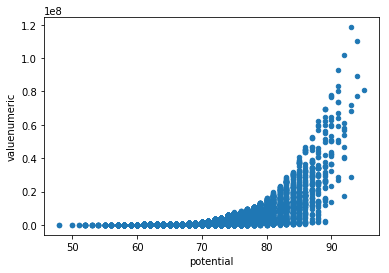

In [29]:
# Your code here:

fifa.plot.scatter(x = 'potential', y = 'valuenumeric')

In [ ]:
#I do not really notice an obvious linear relationship.